In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from scipy.interpolate import make_interp_spline, BSpline
import scipy.integrate as integrate
import numpy as np
import os
import matplotlib.gridspec as gridspec
from glob import glob
import matplotlib.patches as mpatches
os.getcwd()

'/home/gharibnejad/PythonProjects/becke'

In [2]:
directory = "/home/gharibnejad/Documents/DataSets/"
data1 = pd.read_csv(directory+"bluca1.csv",delimiter=',',dtype={'float': 'str'})
data1

,lmax,Alpha=1,Alpha=0.1,Alpha=0.01
0,101,9.260000e-12,3.900000e-12,2.140000e-11
1,83,9.160000e-12,7.520000e-12,2.220000e-11
2,65,9.080000e-12,2.000000e-12,1.950000e-11
3,41,6.620000e-12,1.100000e-11,1.370000e-11
4,21,2.580000e-06,1.150000e-04,7.430000e-06
5,11,5.830000e-03,3.110000e-02,2.350000e-03


In [3]:
data2 = pd.read_csv(directory+"bluca2.csv",delimiter=',',dtype={'float': 'str'})
data2

,lmax,Alpha=1,Alpha=0.1,Alpha=0.01
0,101,5.660000e-10,2.120000e-10,3.350000e-11
1,83,5.650000e-10,2.140000e-10,3.420000e-11
2,65,5.480000e-10,2.090000e-10,3.130000e-11
3,41,1.190000e-09,2.540000e-10,2.920000e-11
4,21,8.370000e-06,6.770000e-08,1.720000e-09
5,11,6.100000e-03,1.140000e-05,1.730000e-06


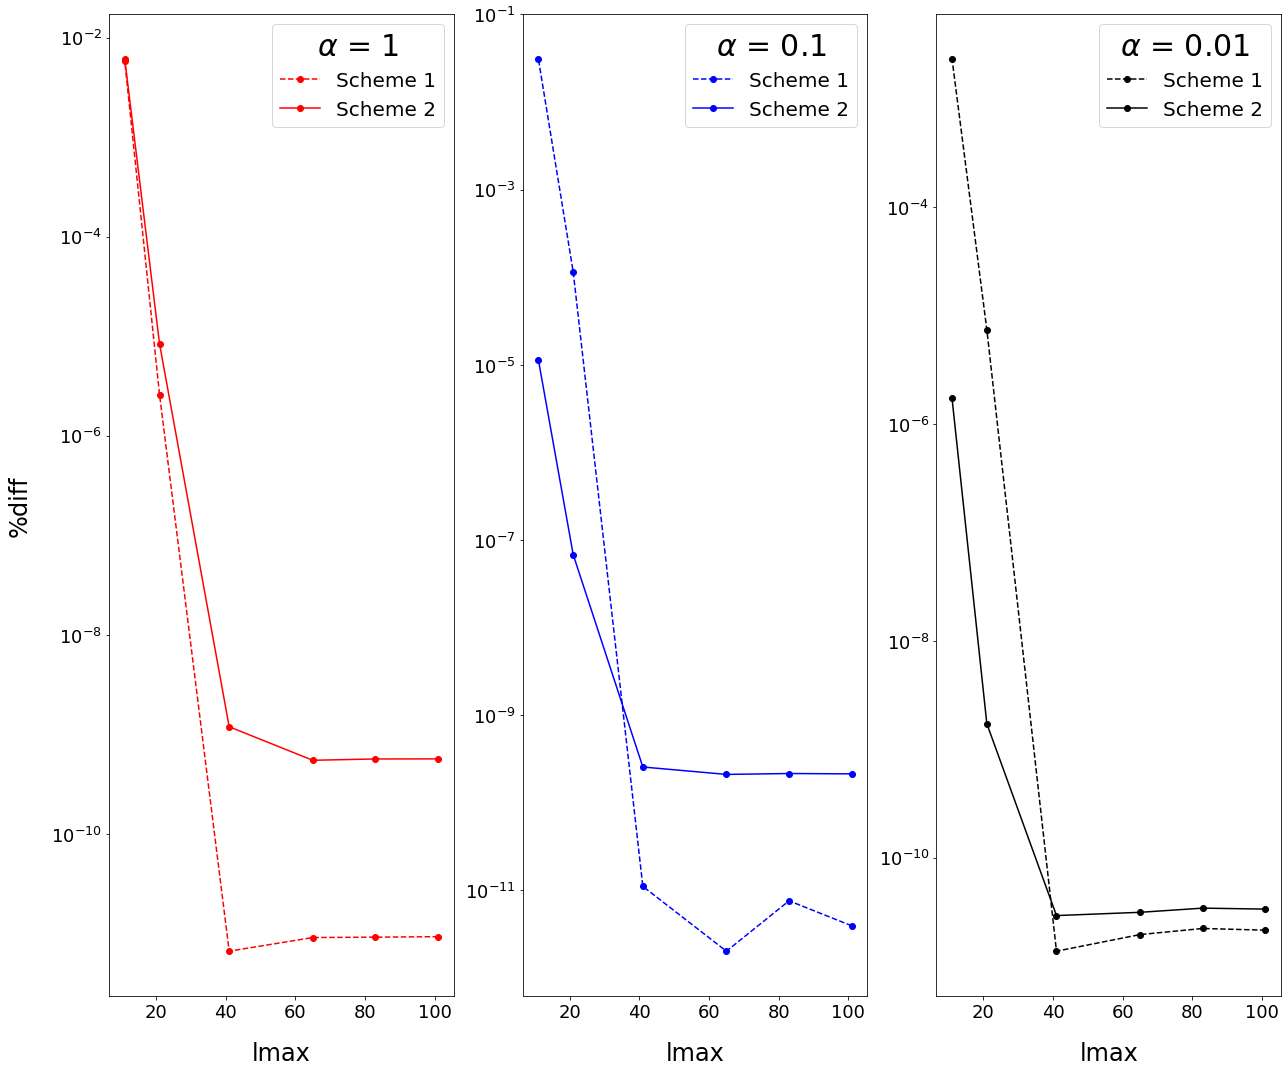

In [43]:
f = plt.figure(figsize=(18, 15))

gs0 = gridspec.GridSpec(1, 1, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0])

ax1 = f.add_subplot(gs00[:, :1])
ax2 = f.add_subplot(gs00[:, 1:2])
ax3 = f.add_subplot(gs00[:, 2:3])

ax1.semilogy(data1['lmax'],data1['Alpha=1'],'ro--')
ax1.semilogy(data2['lmax'],data2['Alpha=1'],'ro-')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax1.legend([label1, label2],title=r"$\alpha$ = 1",title_fontsize=30,fontsize=20, fancybox=True)
ax1.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax1.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)

ax2.semilogy(data1['lmax'],data1['Alpha=0.1'],'bo--')
ax2.semilogy(data2['lmax'],data2['Alpha=0.1'],'bo-')
ax2.legend([label1, label2],title=r"$\alpha$ = 0.1",title_fontsize=30,fontsize=20, fancybox=True)
ax2.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax2.tick_params(axis="x", labelsize=18)
ax2.tick_params(axis="y", labelsize=18)

ax3.semilogy(data1['lmax'],data1['Alpha=0.01'],'ko--')
ax3.semilogy(data2['lmax'],data2['Alpha=0.01'],'ko-')
ax3.legend([label1, label2],title=r"$\alpha$ = 0.01",title_fontsize=30,fontsize=20, fancybox=True)
ax3.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax3.tick_params(axis="x", labelsize=18)
ax3.tick_params(axis="y", labelsize=18)

plt.tight_layout()
plt.savefig("Scheme1VSScheme2.pdf")

In [4]:
data1_1 = pd.read_csv('Alpha_lmax_exp_5R_8.0_scheme1.txt',delimiter=',',dtype={'float': 'str'})
data1_1


,lmax,1000.000,100.000,10.000,1.000,0.100,0.010,1000.000.1,100.000.1,10.000.1,1.000.1,0.100.1,0.010.1
0,7,1.624600e-09,1.738100e-08,2.369800e-08,1.216900e-03,1.682700e-01,2.690500e-02,8.514000e-10,7.337700e-08,2.289000e-06,1.032100e-03,2.911700e-01,2.793000e-02
1,9,1.628200e-09,2.938300e-09,1.411500e-07,2.151600e-04,1.364800e-01,1.902600e-02,8.514000e-10,9.093500e-09,2.287200e-07,1.230600e-03,1.683100e-01,1.918700e-02
2,11,1.627900e-09,1.247500e-09,2.377500e-07,1.878900e-04,1.631100e-02,2.722800e-03,8.514000e-10,1.445100e-08,6.529800e-07,2.447900e-04,2.090700e-02,2.692000e-03
3,15,1.628000e-09,2.122700e-10,2.474900e-08,3.957100e-06,2.480500e-03,1.607500e-04,8.514000e-10,1.251000e-08,1.012700e-07,4.098200e-05,6.395300e-04,1.257000e-04
4,17,1.628700e-09,5.634900e-09,3.860900e-09,1.791900e-06,1.037100e-03,1.217800e-04,8.514000e-10,3.394200e-10,1.588600e-07,8.129600e-07,9.170400e-04,1.199000e-04
5,19,1.628700e-09,5.733800e-09,3.403400e-09,1.266800e-06,8.055600e-05,5.651800e-06,8.514000e-10,1.417300e-09,1.616200e-07,2.719900e-06,2.028000e-04,7.536300e-06
6,21,1.628500e-09,4.056900e-09,3.392000e-10,2.099500e-07,1.580800e-04,1.657800e-05,8.514000e-10,4.693200e-09,5.107300e-08,2.645700e-07,1.117100e-04,1.619000e-05
7,23,1.627100e-09,3.530400e-09,3.466100e-11,8.842000e-09,1.161200e-06,3.180400e-07,8.514000e-10,3.882600e-09,1.093000e-09,3.763900e-08,2.071000e-06,3.350200e-07
8,29,1.624400e-09,3.857100e-09,1.401100e-11,7.913400e-10,7.747800e-07,7.254500e-08,8.514000e-10,5.738200e-09,3.867800e-09,1.872900e-09,4.232400e-07,6.896700e-08
9,31,1.627600e-09,3.887000e-09,1.437700e-11,3.737100e-09,1.367400e-06,2.203500e-07,8.511400e-10,4.119100e-09,1.692900e-08,1.023000e-08,1.269400e-06,2.190800e-07


In [5]:
data1_2 = pd.read_csv('Alpha_lmax_exp_5R_8.0_scheme2.txt',delimiter=',',dtype={'float': 'str'})
data1_2

,lmax,1000.000,100.000,10.000,1.000,0.100,0.010,1000.000.1,100.000.1,10.000.1,1.000.1,0.100.1,0.010.1
0,7,1.026500e-10,2.797100e-06,4.208100e-05,4.304600e-02,3.097300e-02,7.512100e-04,1.362800e-09,6.706900e-05,3.926100e-03,3.051500e-01,1.548700e-02,7.688900e-04
1,9,1.660500e-09,1.346700e-06,1.384600e-05,9.238800e-04,4.442600e-03,1.792700e-04,1.362800e-09,2.231300e-06,1.660200e-03,9.195800e-03,3.042200e-03,1.755800e-04
2,11,1.530600e-09,1.081400e-06,4.002000e-07,6.119900e-05,1.046500e-04,1.634700e-06,1.362800e-09,7.634400e-06,4.318400e-03,6.095400e-03,1.135100e-05,1.733800e-06
3,15,1.577800e-09,6.031500e-07,1.136000e-07,1.195200e-04,1.496900e-05,5.928500e-07,1.362800e-09,5.793900e-06,1.031200e-03,3.916400e-04,7.611000e-06,5.425200e-07
4,17,1.891000e-09,3.177400e-07,5.178600e-08,3.150300e-06,7.065000e-06,2.646000e-07,1.362800e-09,2.586700e-06,1.119200e-03,4.511000e-05,5.493300e-06,2.557100e-07
5,19,1.972000e-09,3.335000e-07,7.206300e-08,2.033200e-06,9.825700e-07,7.464600e-08,1.362800e-09,4.291800e-06,1.761800e-04,8.429600e-05,1.441800e-06,7.251800e-08
6,21,1.821500e-09,6.757300e-08,4.822200e-09,7.919600e-08,2.028400e-07,7.520700e-10,1.362800e-09,7.521800e-06,1.371100e-04,8.370200e-06,6.795100e-08,1.731200e-09
7,23,1.715000e-09,3.635100e-08,2.549300e-10,2.063500e-07,8.984300e-08,4.069700e-09,1.362800e-09,6.123900e-06,2.451900e-04,6.385300e-06,1.007200e-07,4.076600e-09
8,29,1.467700e-09,8.023900e-09,8.282300e-12,3.489300e-09,1.424800e-09,7.579500e-11,1.362800e-09,4.278700e-06,1.856500e-05,3.277400e-08,1.361100e-09,7.973600e-11
9,31,1.803800e-09,3.650000e-09,1.019400e-10,2.173800e-08,3.491500e-08,1.545000e-09,3.267400e-10,2.769500e-06,9.624000e-05,1.140200e-06,3.621500e-08,1.529900e-09


In [55]:
print(data1_1['lmax'])

0      7
1      9
2     11
3     15
4     17
5     19
6     21
7     23
8     29
9     31
10    35
11    41
12    47
13    53
14    59
15    65
16    71
17    77
18    83
19    89
20    95
Name: lmax, dtype: int64


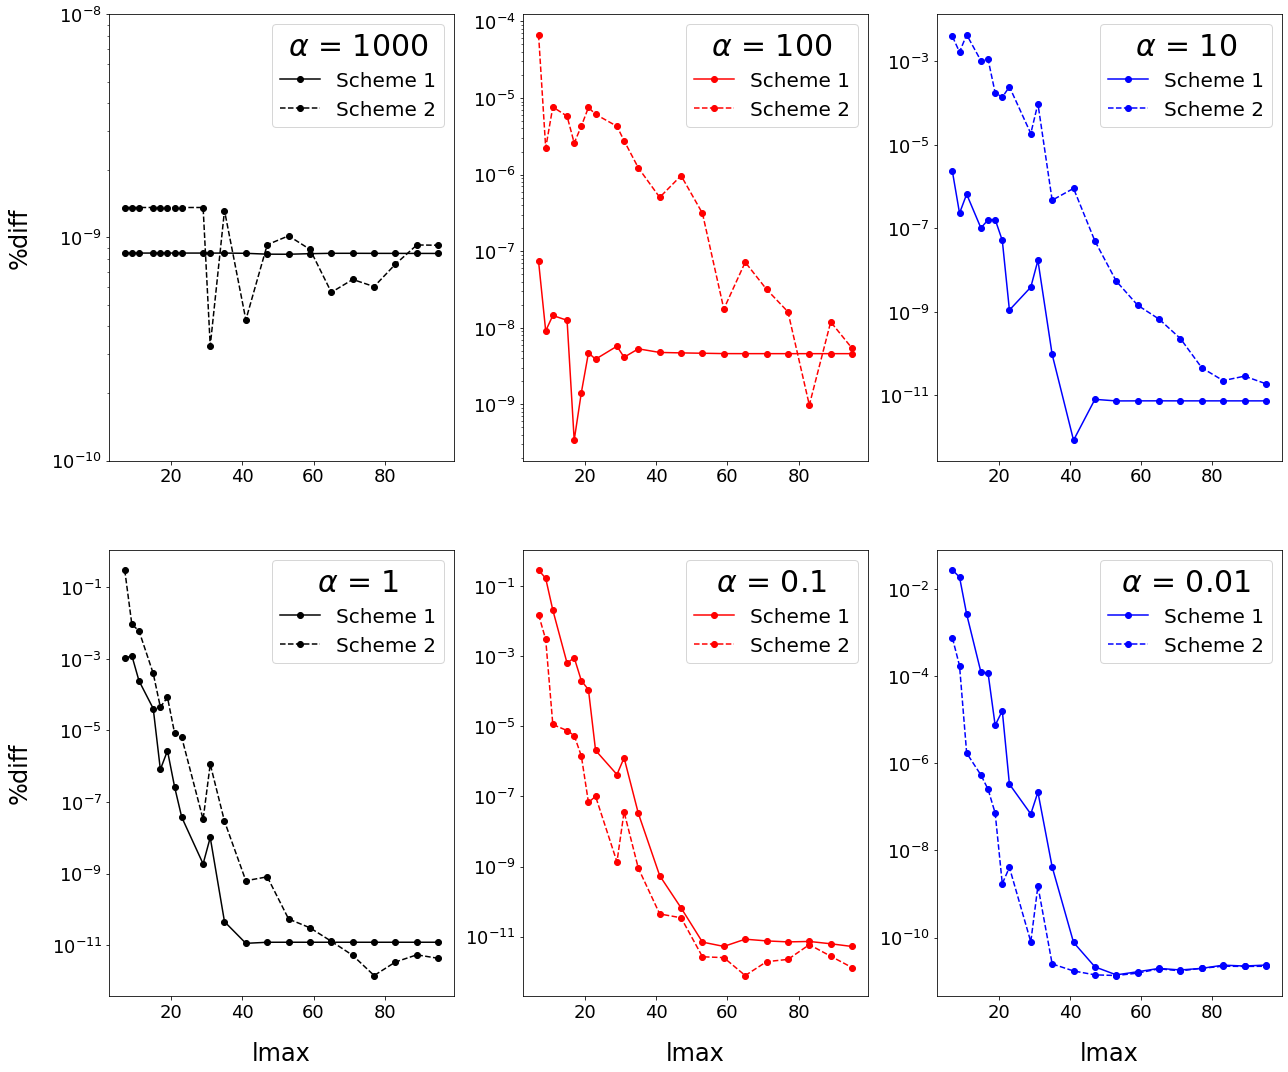

In [71]:
f = plt.figure(figsize=(18, 15))

gs0 = gridspec.GridSpec(1, 1, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0])

ax1 = f.add_subplot(gs00[:-1, :1])
ax2 = f.add_subplot(gs00[:-1, 1:2])
ax3 = f.add_subplot(gs00[:-1, 2:3])

ax4 = f.add_subplot(gs00[1, :1])
ax5 = f.add_subplot(gs00[1, 1:2])
ax6 = f.add_subplot(gs00[1, 2:3])

ax1.semilogy(data1_1['lmax'],data1_1['1000.000.1'],'ko-')
ax1.semilogy(data1_2['lmax'],data1_2['1000.000.1'],'ko--')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax1.legend([label1, label2],title=r"$\alpha$ = 1000",title_fontsize=30,fontsize=20, fancybox=True)
ax1.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax1.set_ylim(bottom=1E-10, top=1E-8)
#ax1.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)

ax2.semilogy(data1_1['lmax'],data1_1[' 100.000.1'],'ro-')
ax2.semilogy(data1_2['lmax'],data1_2[' 100.000.1'],'ro--')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax2.legend([label1, label2],title=r"$\alpha$ = 100",title_fontsize=30,fontsize=20, fancybox=True)
#ax2.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax2.tick_params(axis="x", labelsize=18)
ax2.tick_params(axis="y", labelsize=18)

ax3.semilogy(data1_1['lmax'],data1_1['  10.000.1'],'bo-')
ax3.semilogy(data1_2['lmax'],data1_2['  10.000.1'],'bo--')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax3.legend([label1, label2],title=r"$\alpha$ = 10",title_fontsize=30,fontsize=20, fancybox=True)
#ax3.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax3.tick_params(axis="x", labelsize=18)
ax3.tick_params(axis="y", labelsize=18)

ax4.semilogy(data1_1['lmax'],data1_1['   1.000.1'],'ko-')
ax4.semilogy(data1_2['lmax'],data1_2['   1.000.1'],'ko--')
ax4.legend([label1, label2],title=r"$\alpha$ = 1",title_fontsize=30,fontsize=20, fancybox=True)
ax4.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax4.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax4.tick_params(axis="x", labelsize=18)
ax4.tick_params(axis="y", labelsize=18)

ax5.semilogy(data1_1['lmax'],data1_1['   0.100.1'],'ro-')
ax5.semilogy(data1_2['lmax'],data1_2['   0.100.1'],'ro--')
ax5.legend([label1, label2],title=r"$\alpha$ = 0.1",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax5.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax5.tick_params(axis="x", labelsize=18)
ax5.tick_params(axis="y", labelsize=18)

ax6.semilogy(data1_1['lmax'],data1_1['   0.010.1'],'bo-')
ax6.semilogy(data1_2['lmax'],data1_2['   0.010.1'],'bo--')
ax6.legend([label1, label2],title=r"$\alpha$ = 0.01",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax6.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax6.tick_params(axis="x", labelsize=18)
ax6.tick_params(axis="y", labelsize=18)

plt.tight_layout()
plt.savefig("Scheme1VSScheme2_AtomR=8.pdf")

In [78]:
data2_2 = pd.read_csv('Alpha_lmax_exp_5R_8.0_scheme2.1.txt',delimiter=',',dtype={'float': 'str'})
data2_2

,lmax,1000.000,100.000,10.000,1.000,0.100,0.010,1000.000.1,100.000.1,10.000.1,1.000.1,0.100.1,0.010.1
0,7,1.026500e-10,2.797100e-06,4.208100e-05,4.304600e-02,3.097300e-02,7.512100e-04,1.362800e-09,6.706900e-05,3.926100e-03,3.051500e-01,1.548700e-02,7.688900e-04
1,9,1.660500e-09,1.346700e-06,1.384600e-05,9.238800e-04,4.442600e-03,1.792700e-04,1.362800e-09,2.231300e-06,1.660200e-03,9.195800e-03,3.042200e-03,1.755800e-04
2,11,1.530600e-09,1.081400e-06,4.002000e-07,6.119900e-05,1.046500e-04,1.634700e-06,1.362800e-09,7.634400e-06,4.318400e-03,6.095400e-03,1.135100e-05,1.733800e-06
3,15,1.577800e-09,6.031500e-07,1.136000e-07,1.195200e-04,1.496900e-05,5.928500e-07,1.362800e-09,5.793900e-06,1.031200e-03,3.916400e-04,7.611000e-06,5.425200e-07
4,17,1.891000e-09,3.177400e-07,5.178600e-08,3.150300e-06,7.065000e-06,2.646000e-07,1.362800e-09,2.586700e-06,1.119200e-03,4.511000e-05,5.493300e-06,2.557100e-07
5,19,1.972000e-09,3.335000e-07,7.206300e-08,2.033200e-06,9.825700e-07,7.464600e-08,1.362800e-09,4.291800e-06,1.761800e-04,8.429600e-05,1.441800e-06,7.251800e-08
6,21,1.821500e-09,6.757300e-08,4.822200e-09,7.919600e-08,2.028400e-07,7.520700e-10,1.362800e-09,7.521800e-06,1.371100e-04,8.370200e-06,6.795100e-08,1.731200e-09
7,23,1.715000e-09,3.635100e-08,2.549300e-10,2.063500e-07,8.984300e-08,4.069700e-09,1.362800e-09,6.123900e-06,2.451900e-04,6.385300e-06,1.007200e-07,4.076600e-09
8,29,1.467700e-09,8.023900e-09,8.282300e-12,3.489300e-09,1.424800e-09,7.579500e-11,1.362800e-09,4.278700e-06,1.856500e-05,3.277400e-08,1.361100e-09,7.973600e-11
9,31,1.803800e-09,3.650000e-09,1.019400e-10,2.173800e-08,3.491500e-08,1.545000e-09,3.267400e-10,2.769500e-06,9.624000e-05,1.140200e-06,3.621500e-08,1.529900e-09


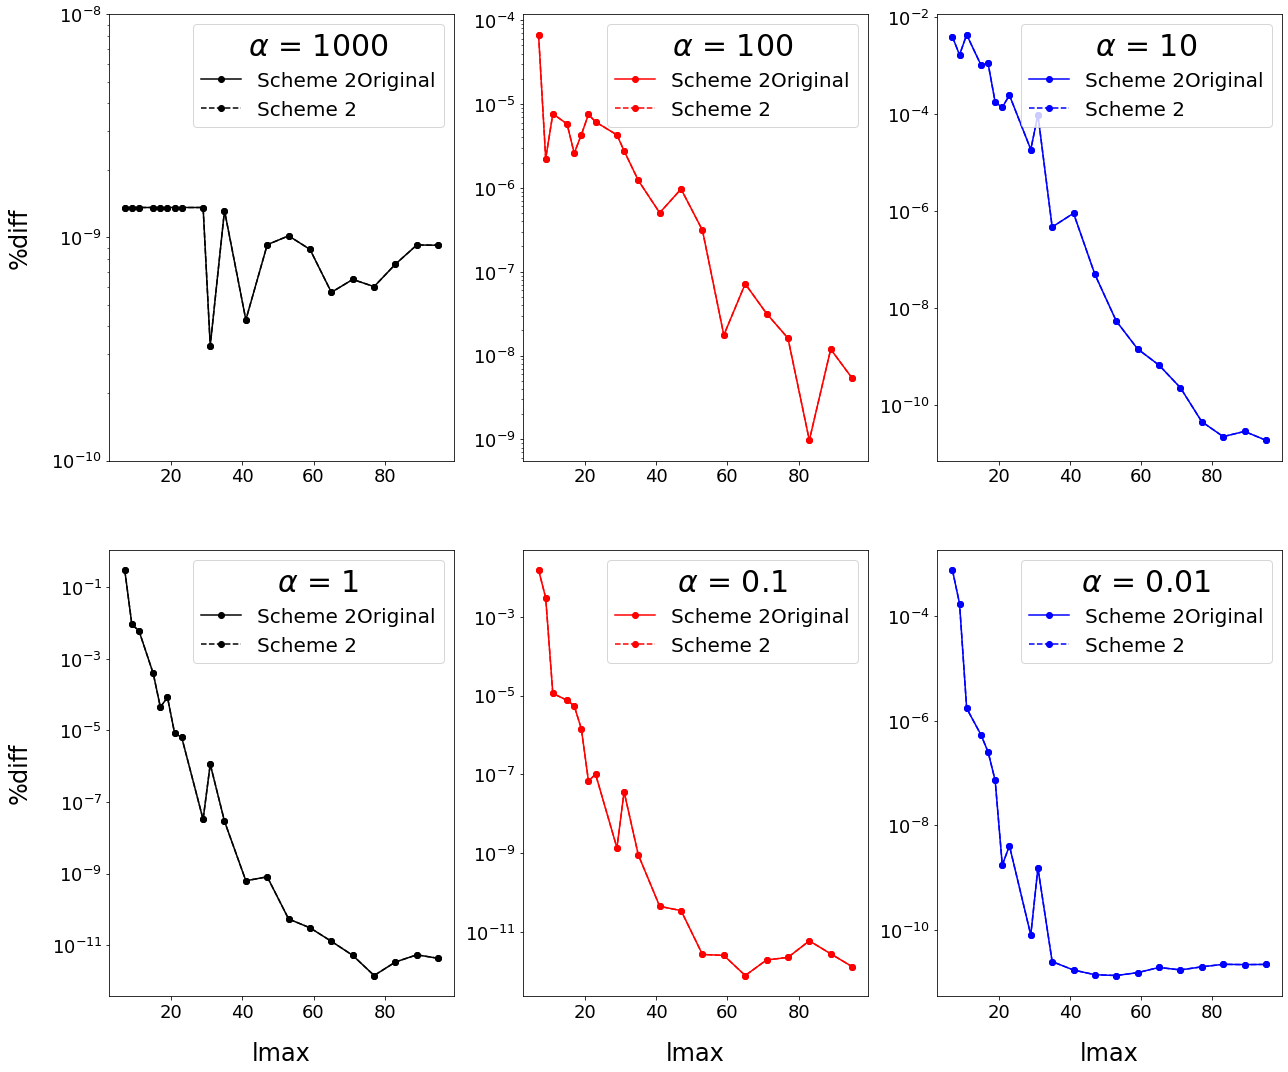

In [80]:
###Just a check to see if accuracies are affected by throwing out (really repalcing with a tolerance)
##small distance values in scheme2
f = plt.figure(figsize=(18, 15))

gs0 = gridspec.GridSpec(1, 1, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs0[0])

ax1 = f.add_subplot(gs00[:-1, :1])
ax2 = f.add_subplot(gs00[:-1, 1:2])
ax3 = f.add_subplot(gs00[:-1, 2:3])

ax4 = f.add_subplot(gs00[1, :1])
ax5 = f.add_subplot(gs00[1, 1:2])
ax6 = f.add_subplot(gs00[1, 2:3])

ax1.semilogy(data2_2['lmax'],data2_2['1000.000.1'],'ko-')
ax1.semilogy(data1_2['lmax'],data1_2['1000.000.1'],'ko--')
label1 = "Scheme 2Original"
label2 = "Scheme 2"
ax1.legend([label1, label2],title=r"$\alpha$ = 1000",title_fontsize=30,fontsize=20, fancybox=True)
ax1.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax1.set_ylim(bottom=1E-10, top=1E-8)
#ax1.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax1.tick_params(axis="x", labelsize=18)
ax1.tick_params(axis="y", labelsize=18)

ax2.semilogy(data2_2['lmax'],data2_2[' 100.000.1'],'ro-')
ax2.semilogy(data1_2['lmax'],data1_2[' 100.000.1'],'ro--')

ax2.legend([label1, label2],title=r"$\alpha$ = 100",title_fontsize=30,fontsize=20, fancybox=True)
#ax2.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax2.tick_params(axis="x", labelsize=18)
ax2.tick_params(axis="y", labelsize=18)

ax3.semilogy(data2_2['lmax'],data2_2['  10.000.1'],'bo-')
ax3.semilogy(data1_2['lmax'],data1_2['  10.000.1'],'bo--')

ax3.legend([label1, label2],title=r"$\alpha$ = 10",title_fontsize=30,fontsize=20, fancybox=True)
#ax3.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax3.tick_params(axis="x", labelsize=18)
ax3.tick_params(axis="y", labelsize=18)

ax4.semilogy(data2_2['lmax'],data2_2['   1.000.1'],'ko-')
ax4.semilogy(data1_2['lmax'],data1_2['   1.000.1'],'ko--')
ax4.legend([label1, label2],title=r"$\alpha$ = 1",title_fontsize=30,fontsize=20, fancybox=True)
ax4.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax4.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax4.tick_params(axis="x", labelsize=18)
ax4.tick_params(axis="y", labelsize=18)

ax5.semilogy(data2_2['lmax'],data2_2['   0.100.1'],'ro-')
ax5.semilogy(data1_2['lmax'],data1_2['   0.100.1'],'ro--')
ax5.legend([label1, label2],title=r"$\alpha$ = 0.1",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax5.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax5.tick_params(axis="x", labelsize=18)
ax5.tick_params(axis="y", labelsize=18)

ax6.semilogy(data2_2['lmax'],data2_2['   0.010.1'],'bo-')
ax6.semilogy(data1_2['lmax'],data1_2['   0.010.1'],'bo--')
ax6.legend([label1, label2],title=r"$\alpha$ = 0.01",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax6.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax6.tick_params(axis="x", labelsize=18)
ax6.tick_params(axis="y", labelsize=18)

plt.tight_layout()

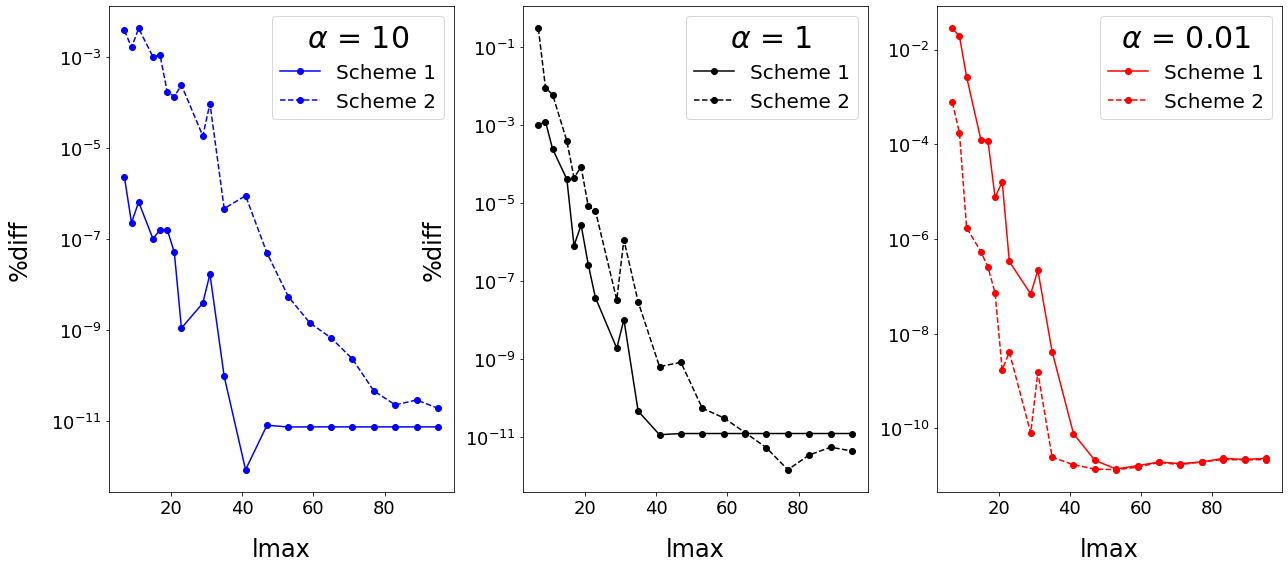

In [91]:
##Graph selection 

f = plt.figure(figsize=(18, 8))

gs0 = gridspec.GridSpec(1, 1, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0])

ax3 = f.add_subplot(gs00[0, :1])
ax4 = f.add_subplot(gs00[0, 1:2])
ax6 = f.add_subplot(gs00[0, 2:3])

# ax4 = f.add_subplot(gs00[1, :1])
# ax5 = f.add_subplot(gs00[1, 1:2])
# ax6 = f.add_subplot(gs00[1, 2:3])

# ax1.semilogy(data1_1['lmax'],data1_1['1000.000.1'],'ko-')
# ax1.semilogy(data1_2['lmax'],data1_2['1000.000.1'],'ko--')
# label1 = "Scheme 1"
# label2 = "Scheme 2"
# ax1.legend([label1, label2],title=r"$\alpha$ = 1000",title_fontsize=30,fontsize=20, fancybox=True)
ax3.set_ylabel('%diff', labelpad = 20,fontsize=24)
# ax1.set_ylim(bottom=1E-10, top=1E-8)
# #ax1.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax1.tick_params(axis="x", labelsize=18)
# ax1.tick_params(axis="y", labelsize=18)

# ax2.semilogy(data1_1['lmax'],data1_1[' 100.000.1'],'ro-')
# ax2.semilogy(data1_2['lmax'],data1_2[' 100.000.1'],'ro--')
# label1 = "Scheme 1"
# label2 = "Scheme 2"
# ax2.legend([label1, label2],title=r"$\alpha$ = 100",title_fontsize=30,fontsize=20, fancybox=True)
# #ax2.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax2.tick_params(axis="x", labelsize=18)
# ax2.tick_params(axis="y", labelsize=18)

ax3.semilogy(data1_1['lmax'],data1_1['  10.000.1'],'bo-')
ax3.semilogy(data1_2['lmax'],data1_2['  10.000.1'],'bo--')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax3.legend([label1, label2],title=r"$\alpha$ = 10",title_fontsize=30,fontsize=20, fancybox=True)
ax3.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax3.tick_params(axis="x", labelsize=18)
ax3.tick_params(axis="y", labelsize=18)

ax4.semilogy(data1_1['lmax'],data1_1['   1.000.1'],'ko-')
ax4.semilogy(data1_2['lmax'],data1_2['   1.000.1'],'ko--')
ax4.legend([label1, label2],title=r"$\alpha$ = 1",title_fontsize=30,fontsize=20, fancybox=True)
ax4.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax4.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax4.tick_params(axis="x", labelsize=18)
ax4.tick_params(axis="y", labelsize=18)

# ax5.semilogy(data1_1['lmax'],data1_1['   0.100.1'],'ro-')
# ax5.semilogy(data1_2['lmax'],data1_2['   0.100.1'],'ro--')
# ax5.legend([label1, label2],title=r"$\alpha$ = 0.1",title_fontsize=30,fontsize=20, fancybox=True)
# #ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
# ax5.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax5.tick_params(axis="x", labelsize=18)
# ax5.tick_params(axis="y", labelsize=18)

ax6.semilogy(data1_1['lmax'],data1_1['   0.010.1'],'ro-')
ax6.semilogy(data1_2['lmax'],data1_2['   0.010.1'],'ro--')
ax6.legend([label1, label2],title=r"$\alpha$ = 0.01",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax6.set_xlabel("lmax", labelpad = 20,fontsize=24)
ax6.tick_params(axis="x", labelsize=18)
ax6.tick_params(axis="y", labelsize=18)

plt.tight_layout()
plt.savefig("Scheme1VSScheme2_FinalAtomR=8.pdf")

In [7]:
data10_1 = pd.read_csv('Alpha_lmax_exp_5R_10.0_sch1.txt',delimiter=',',dtype={'float': 'str'})
data10_1

,lmax,1000.000,100.000,10.000,1.000,0.100,0.010,1000.000.1,100.000.1,10.000.1,1.000.1,0.100.1,0.010.1
0,7,8.282000e-09,7.741500e-09,2.576500e-09,1.355400e-04,1.095200e-01,3.956300e-02,6.665200e-09,9.071800e-09,2.458500e-07,1.373700e-04,2.320100e-01,4.257300e-02
1,9,8.282400e-09,5.559600e-09,1.513200e-08,2.688900e-05,7.114300e-02,2.359500e-02,6.665200e-09,2.169100e-09,2.459000e-08,1.416100e-04,1.181600e-01,2.450100e-02
2,11,8.282400e-09,6.009000e-09,2.554700e-08,2.064500e-05,2.021100e-04,1.723300e-03,6.665200e-09,2.744300e-09,7.016500e-08,2.906100e-05,9.254300e-03,1.811000e-03
3,15,8.282400e-09,5.852300e-09,2.677900e-09,7.853200e-07,3.922400e-04,9.427700e-05,6.665200e-09,2.535900e-09,1.091600e-08,3.921400e-06,1.011900e-03,4.444200e-05
4,17,8.282500e-09,6.480100e-09,3.936400e-10,1.848500e-07,6.681200e-04,1.792200e-04,6.665200e-09,1.229100e-09,1.703000e-08,1.556000e-08,7.245300e-04,1.802000e-04
5,19,8.282500e-09,6.490800e-09,3.445000e-10,7.944800e-08,1.838700e-04,2.208900e-05,6.665200e-09,1.040400e-09,1.732300e-08,1.821400e-07,2.242800e-04,2.485000e-05
6,21,8.282400e-09,6.310700e-09,1.563200e-11,2.164500e-08,1.439800e-04,3.634600e-05,6.665200e-09,1.696600e-09,5.509500e-09,4.220400e-08,1.227600e-04,3.608800e-05
7,23,8.282300e-09,6.254200e-09,2.452500e-11,6.295600e-10,8.563700e-06,1.545600e-06,6.665200e-09,1.609500e-09,9.481300e-11,3.816800e-09,6.279700e-06,1.511500e-06
8,29,8.282000e-09,6.289200e-09,2.231500e-11,9.329200e-11,1.053800e-06,2.507900e-07,6.665200e-09,1.808800e-09,4.386800e-10,2.154800e-10,8.577300e-07,2.479200e-07
9,31,8.282300e-09,6.292500e-09,2.234900e-11,4.427300e-10,9.274100e-07,6.723700e-08,6.665100e-09,1.634900e-09,1.795100e-09,1.197100e-09,1.783300e-07,8.518700e-08


In [6]:
data10_2 = pd.read_csv('Alpha_lmax_exp_5R_10.0_sch2.txt',delimiter=',',dtype={'float': 'str'})
data10_2

,lmax,1000.000,100.000,10.000,1.000,0.100,0.010,1000.000.1,100.000.1,10.000.1,1.000.1,0.100.1,0.010.1
0,7,6.759300e-09,2.799600e-06,4.208100e-05,4.304600e-02,3.097300e-02,7.512100e-04,7.179500e-09,6.706600e-05,3.926100e-03,3.051500e-01,1.548700e-02,7.688900e-04
1,9,8.317100e-09,1.344300e-06,1.384600e-05,9.238800e-04,4.442600e-03,1.792700e-04,7.179500e-09,2.228300e-06,1.660200e-03,9.195800e-03,3.042200e-03,1.755800e-04
2,11,8.187300e-09,1.078900e-06,4.002000e-07,6.119900e-05,1.046500e-04,1.634700e-06,7.179500e-09,7.631500e-06,4.318400e-03,6.095400e-03,1.135100e-05,1.733800e-06
3,15,8.234500e-09,6.007000e-07,1.136000e-07,1.195200e-04,1.496900e-05,5.928500e-07,7.179500e-09,5.791000e-06,1.031200e-03,3.916400e-04,7.611000e-06,5.425200e-07
4,17,8.547600e-09,3.201900e-07,5.179200e-08,3.150300e-06,7.065000e-06,2.646000e-07,7.179500e-09,2.589600e-06,1.119200e-03,4.511000e-05,5.493300e-06,2.557100e-07
5,19,8.628600e-09,3.359500e-07,7.206800e-08,2.033200e-06,9.825700e-07,7.464600e-08,7.179500e-09,4.288900e-06,1.761800e-04,8.429600e-05,1.441800e-06,7.251800e-08
6,21,8.478100e-09,7.002300e-08,4.816300e-09,7.920100e-08,2.028400e-07,7.520900e-10,7.179500e-09,7.518900e-06,1.371100e-04,8.370200e-06,6.795100e-08,1.731200e-09
7,23,8.371600e-09,3.390100e-08,2.491100e-10,2.063600e-07,8.984300e-08,4.069700e-09,7.179500e-09,6.121000e-06,2.451900e-04,6.385300e-06,1.007200e-07,4.076600e-09
8,29,8.124300e-09,1.047500e-08,1.411100e-11,3.494500e-09,1.425000e-09,7.578400e-11,7.179500e-09,4.275800e-06,1.856500e-05,3.277700e-08,1.360800e-09,7.973600e-11
9,31,8.460400e-09,6.100900e-09,1.077700e-10,2.173300e-08,3.491500e-08,1.545100e-09,6.143400e-09,2.772400e-06,9.624000e-05,1.140200e-06,3.621500e-08,1.529900e-09


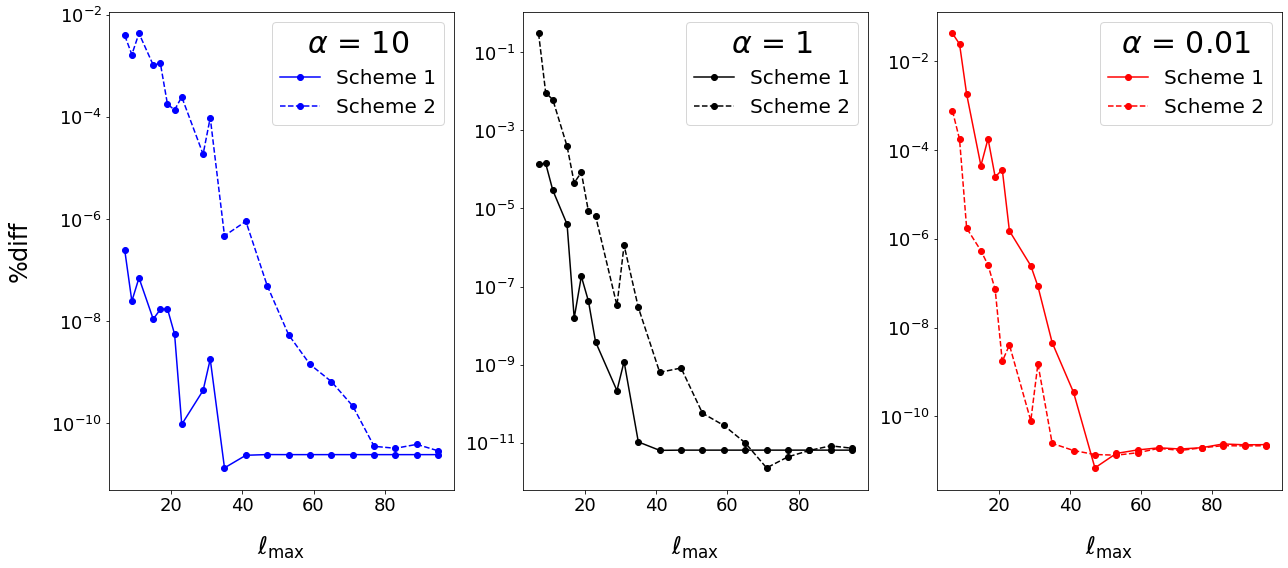

In [18]:
##Graph selection 

f = plt.figure(figsize=(18, 8))

gs0 = gridspec.GridSpec(1, 1, figure=f)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0])

ax3 = f.add_subplot(gs00[0, :1])
ax4 = f.add_subplot(gs00[0, 1:2])
ax6 = f.add_subplot(gs00[0, 2:3])

# ax4 = f.add_subplot(gs00[1, :1])
# ax5 = f.add_subplot(gs00[1, 1:2])
# ax6 = f.add_subplot(gs00[1, 2:3])

# ax1.semilogy(data10_1['lmax'],data10_1['1000.000.1'],'ko-')
# ax1.semilogy(data10_2['lmax'],data10_2['1000.000.1'],'ko--')
# label1 = "Scheme 1"
# label2 = "Scheme 2"
# ax1.legend([label1, label2],title=r"$\alpha$ = 1000",title_fontsize=30,fontsize=20, fancybox=True)
ax3.set_ylabel('%diff', labelpad = 20,fontsize=24)
# ax1.set_ylim(bottom=1E-10, top=1E-8)
# #ax1.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax1.tick_params(axis="x", labelsize=18)
# ax1.tick_params(axis="y", labelsize=18)

# ax2.semilogy(data10_1['lmax'],data10_1[' 100.000.1'],'ro-')
# ax2.semilogy(data10_2['lmax'],data10_2[' 100.000.1'],'ro--')
# label1 = "Scheme 1"
# label2 = "Scheme 2"
# ax2.legend([label1, label2],title=r"$\alpha$ = 100",title_fontsize=30,fontsize=20, fancybox=True)
# #ax2.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax2.tick_params(axis="x", labelsize=18)
# ax2.tick_params(axis="y", labelsize=18)

ax3.semilogy(data10_1['lmax'],data10_1['  10.000.1'],'bo-')
ax3.semilogy(data10_2['lmax'],data10_2['  10.000.1'],'bo--')
label1 = "Scheme 1"
label2 = "Scheme 2"
ax3.legend([label1, label2],title=r"$\alpha$ = 10",title_fontsize=30,fontsize=20, fancybox=True)
ax3.set_xlabel(r"$\ell_{\rm max}$", labelpad = 20,fontsize=24)
ax3.tick_params(axis="x", labelsize=18)
ax3.tick_params(axis="y", labelsize=18)

ax4.semilogy(data10_1['lmax'],data10_1['   1.000.1'],'ko-')
ax4.semilogy(data10_2['lmax'],data10_2['   1.000.1'],'ko--')
ax4.legend([label1, label2],title=r"$\alpha$ = 1",title_fontsize=30,fontsize=20, fancybox=True)
#ax4.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax4.set_xlabel(r"$\ell_{\rm max}$", labelpad = 20,fontsize=24)
ax4.tick_params(axis="x", labelsize=18)
ax4.tick_params(axis="y", labelsize=18)

# ax5.semilogy(data10_1['lmax'],data10_1['   0.100.1'],'ro-')
# ax5.semilogy(data10_2['lmax'],data10_2['   0.100.1'],'ro--')
# ax5.legend([label1, label2],title=r"$\alpha$ = 0.1",title_fontsize=30,fontsize=20, fancybox=True)
# #ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
# ax5.set_xlabel("lmax", labelpad = 20,fontsize=24)
# ax5.tick_params(axis="x", labelsize=18)
# ax5.tick_params(axis="y", labelsize=18)

ax6.semilogy(data10_1['lmax'],data10_1['   0.010.1'],'ro-')
ax6.semilogy(data10_2['lmax'],data10_2['   0.010.1'],'ro--')
ax6.legend([label1, label2],title=r"$\alpha$ = 0.01",title_fontsize=30,fontsize=20, fancybox=True)
#ax5.set_ylabel('%diff', labelpad = 20,fontsize=24)
ax6.set_xlabel(r"$\ell_{\rm max}$", labelpad = 20,fontsize=24)
ax6.tick_params(axis="x", labelsize=18)
ax6.tick_params(axis="y", labelsize=18)

plt.tight_layout()
plt.savefig("Scheme1VSScheme2_FinalAtomR=10.pdf")